In [289]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [290]:
data = pd.read_csv('heart.csv')
df = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data contains

##### age - age in years
##### sex - (1 = male; 0 = female)
##### cp - chest pain type - (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4=asymptomatic)
##### trestbps - resting blood pressure (in mm Hg on admission to the hospital)
##### chol - serum cholestoral in mg/dl
##### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
##### restecg - resting electrocardiographic results - (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
##### thalach - maximum heart rate achieved
##### exang - exercise induced angina (1 = yes; 0 = no)
##### oldpeak - ST depression induced by exercise relative to rest
##### slope - the slope of the peak exercise ST segment - (1 = upsloping, 2 = flat, 3 = downsloping)
##### ca - number of major vessels (0-3) colored by flourosopy
##### thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
##### target - have disease or not (1=yes, 0=no)

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [292]:
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['ca'] = data['ca'].astype('object')
data['thal'] = data['thal'].astype('object')
data['target'] = data['target'].astype('object')

sex1 = []
target1 = []
for sex_value in data['sex']:
    if sex_value == 0:
        sex1.append('F') 
    else:
        sex1.append('M')
for target_value in data['target']:
    if target_value == 0:
        target1.append('N')
    else:
        target1.append('Y')
data['sex'] = sex1
data['target'] = target1

In [293]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
193,60,M,0,145,282,0,0,142,1,2.8,1,2,3,N
158,58,M,1,125,220,0,1,144,0,0.4,1,4,3,Y
33,54,M,2,125,273,0,0,152,0,0.5,0,1,2,Y
88,54,F,2,110,214,0,1,158,0,1.6,1,0,2,Y
21,44,M,2,130,233,0,1,179,1,0.4,2,0,2,Y


In [294]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [295]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


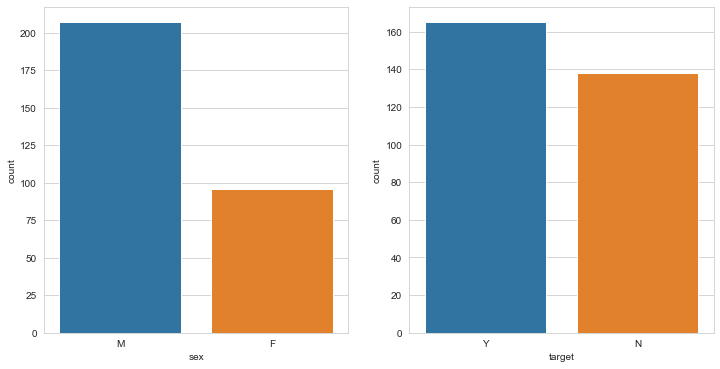

In [296]:
f,axes = plt.subplots(1,2, figsize=(12,6))
sb.countplot(data.sex, ax = axes[0])
sb.countplot(data.target, ax = axes[1])

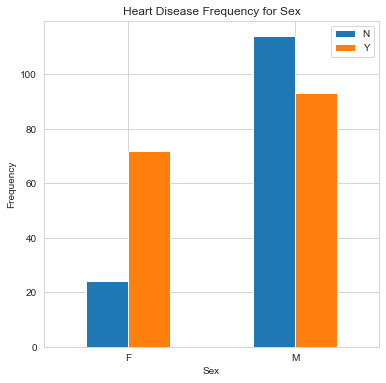

In [297]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(6,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["N", "Y"])
plt.ylabel('Frequency')
plt.show()

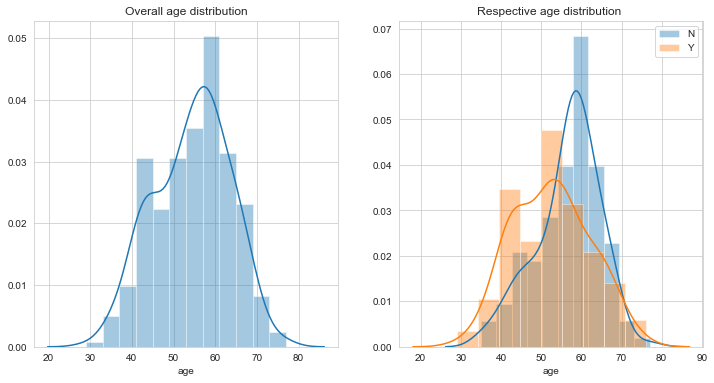

In [298]:
f,axes = plt.subplots(1,2, figsize=(12,6))
ax1=sb.distplot(data['age'],ax=axes[0])
ax1.title.set_text('Overall age distribution')
ax2=sb.distplot(data[data['target'] == 'N']['age'], ax = axes[1])
sb.distplot(data[data['target'] == 'Y']['age'], ax = axes[1])
plt.title('Respective age distribution ')
plt.legend(["N", "Y"])

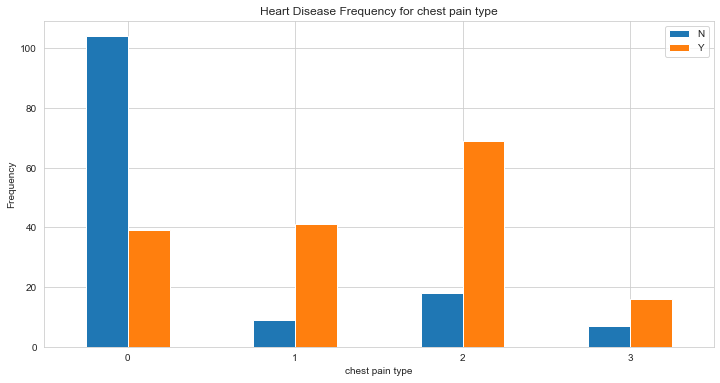

In [299]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(12,6))
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.legend(["N", "Y"])
plt.ylabel('Frequency')
plt.show()

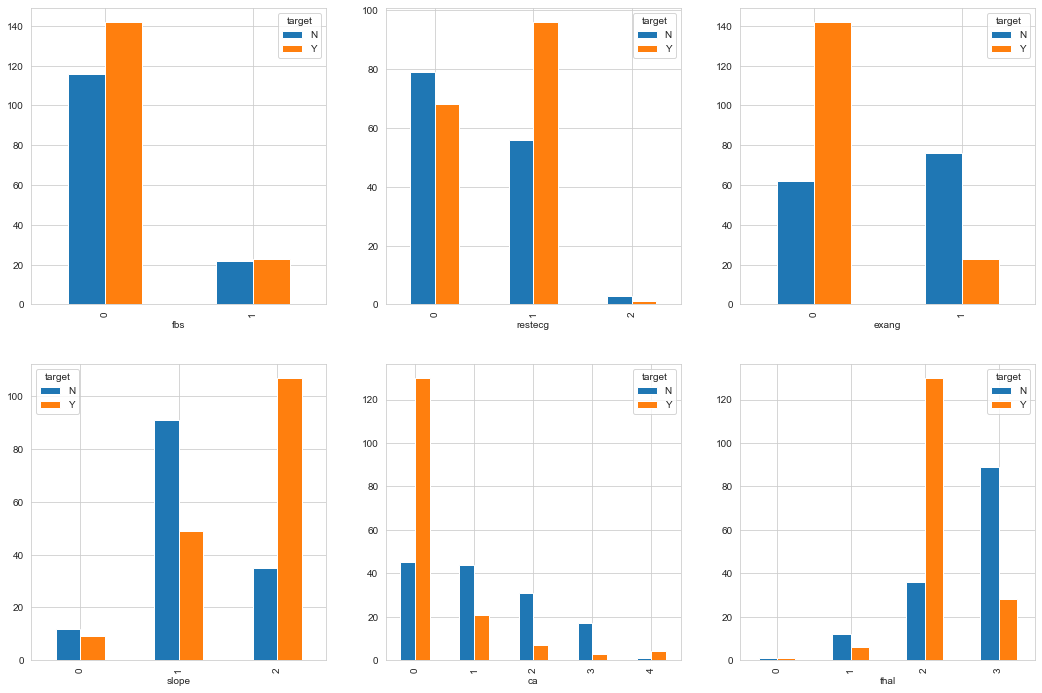

In [300]:
f,axes = plt.subplots(2,3, figsize=(18,12))
pd.crosstab(data.fbs,data.target).plot(kind="bar",ax=axes[0,0])
pd.crosstab(data.restecg,data.target).plot(kind="bar",ax=axes[0,1])
pd.crosstab(data.exang,data.target).plot(kind="bar",ax=axes[0,2])
pd.crosstab(data.slope,data.target).plot(kind="bar",ax=axes[1,0])
pd.crosstab(data.ca,data.target).plot(kind="bar",ax=axes[1,1])
pd.crosstab(data.thal,data.target).plot(kind="bar",ax=axes[1,2])

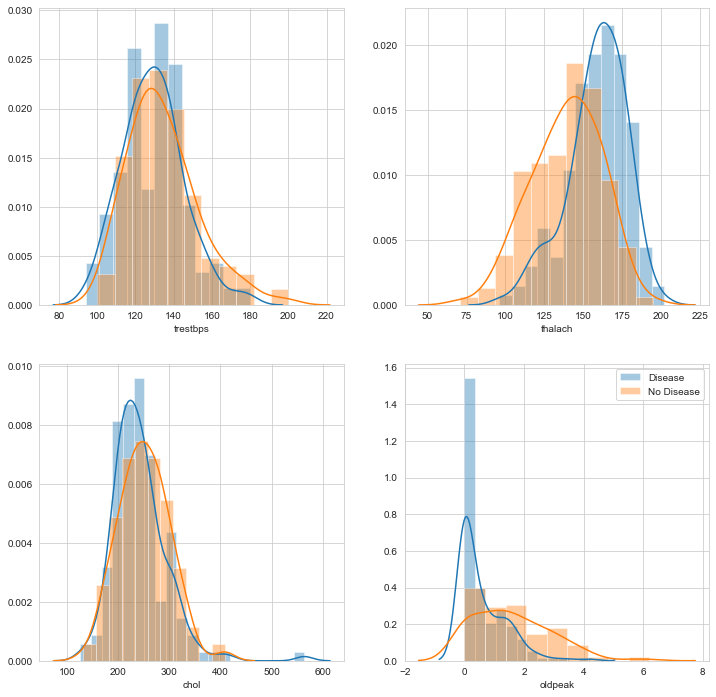

In [301]:
f,axes = plt.subplots(2,2, figsize=(12,12))
sb.distplot(data[data["target"]=='Y']['trestbps'],ax=axes[0,0])
sb.distplot(data[data["target"]=='N']['trestbps'],ax=axes[0,0])
sb.distplot(data[data["target"]=='Y']['thalach'],ax=axes[0,1])
sb.distplot(data[data["target"]=='N']['thalach'],ax=axes[0,1])
sb.distplot(data[data["target"]=='Y']['chol'],ax=axes[1,0])
sb.distplot(data[data["target"]=='N']['chol'],ax=axes[1,0])
sb.distplot(data[data["target"]=='Y']['oldpeak'],ax=axes[1,1])
sb.distplot(data[data["target"]=='N']['oldpeak'],ax=axes[1,1])

plt.legend(["Disease", "No Disease"])
plt.show()

In [302]:
accuracies={}

# Decision Tree

In [303]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
import graphviz

In [304]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2)

In [305]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 5)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

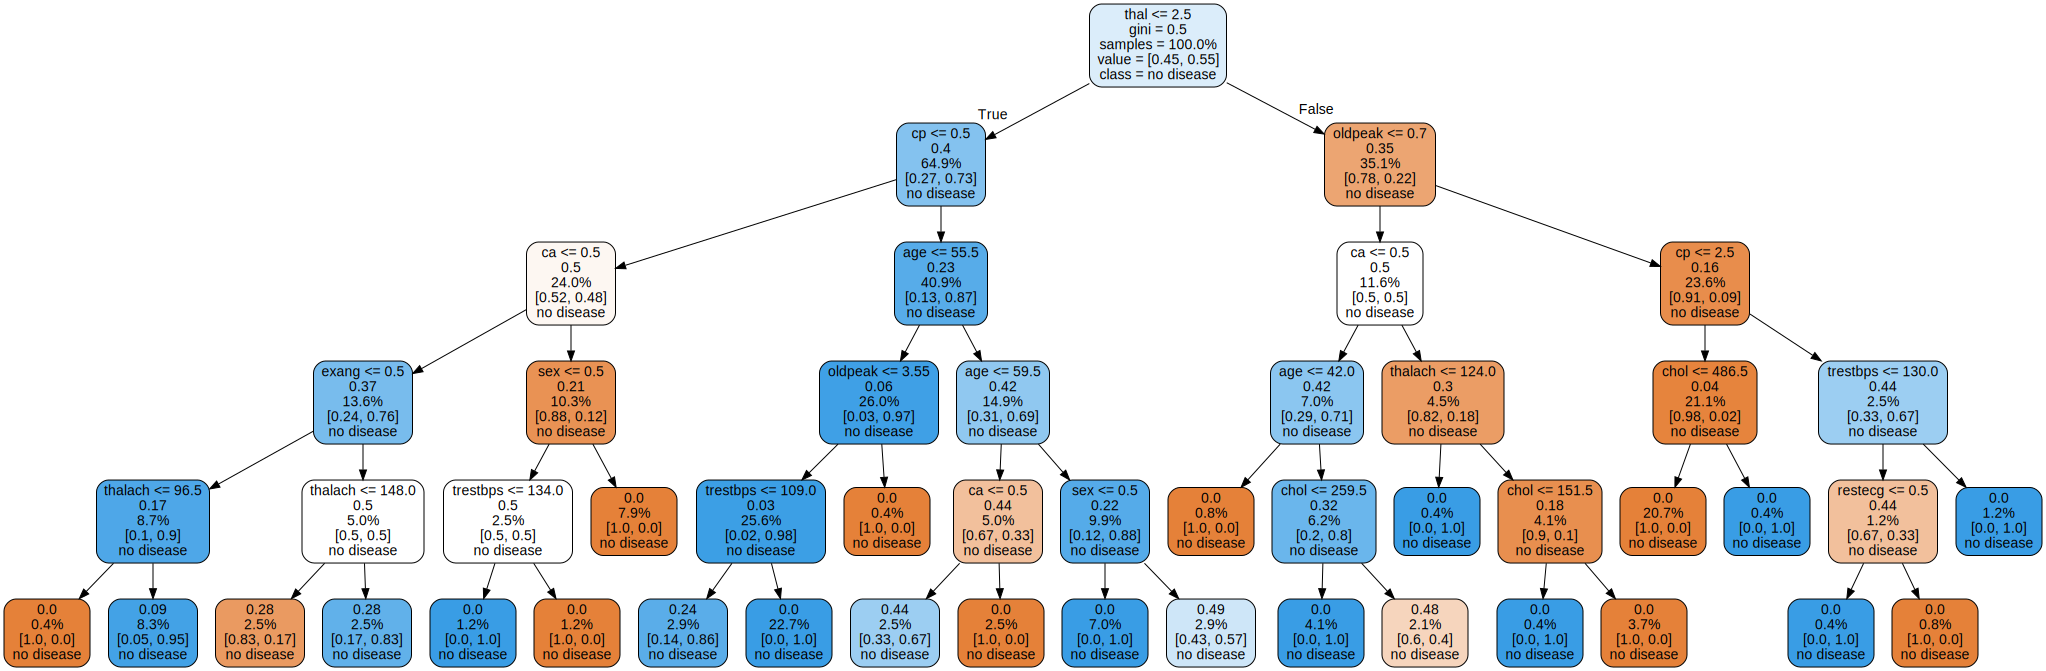

In [306]:
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

tree=export_graphviz(dectree, out_file=None, 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)
graphviz.Source(tree)

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y_pred = dectree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {0:0.4f}".format(acc))

Decision Tree Test Accuracy 0.7541


In [308]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix

In [309]:
y_predict = dectree.predict(X_test)
y_pred_quant = dectree.predict_proba(X_test)[:, 1]
y_pred_bin = dectree.predict(X_test)

In [310]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[23,  6],
       [ 9, 23]], dtype=int64)

In [311]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.71875
Specificity :  0.7931034482758621


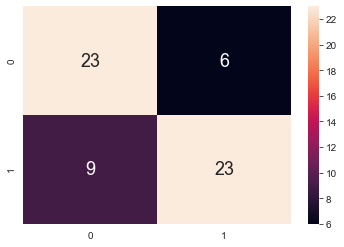

In [312]:
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred_bin), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Create Dummy Variables

In [313]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['restecg'], prefix = "restecg")

In [314]:
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,1,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,0,1,0,1,0


In [315]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,1,0


In [316]:
df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
dtype: object

# Splite x,y

In [317]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_data.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
dtype: object

In [318]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,)

# Apply Logistic Regression

In [320]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

acc=accuracy_score(y_test, y_pred) 
accuracies['Logistic Regression']=acc

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(acc))

Logistic Regression accuracy score with all the features: 0.8689


# Apply Random Forest Classification

In [321]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

acc=accuracy_score(y_test, y_pred) 
accuracies['Random Forest Classification']=acc


print('Random Forest Algorithm Accuracy with all the features: {0:0.4f}'. format(acc))

Random Forest Algorithm Accuracy with all the features: 0.8525


# Apply Naive Bayes Classification

In [322]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

acc=accuracy_score(y_test, y_pred) 
accuracies['Naive Bayes']=acc

print('Naive Bayes Algorithm Accuracy with all the features: {0:0.4f}'. format(acc))

Naive Bayes Algorithm Accuracy with all the features: 0.7213


# Apply Support Vector Machine (SVM)

In [323]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

acc=accuracy_score(y_test, y_pred) 
accuracies['SVM']=acc
print('SVM Accuracy with all the features: {0:0.4f}'. format(acc))

SVM Accuracy with all the features: 0.8361


# Comparing Models

In [324]:
from tabulate import tabulate
headers=["Algorithms","Accuracy"]
print(tabulate(accuracies.items(), headers = headers))

Algorithms                      Accuracy
----------------------------  ----------
Decision Tree                   0.754098
Logistic Regression             0.868852
Random Forest Classification    0.852459
Naive Bayes                     0.721311
SVM                             0.836066


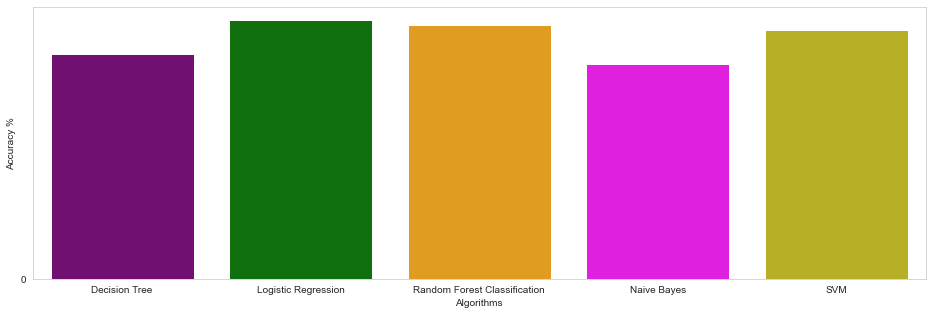

In [325]:
colors = ["purple", "green", "orange", "magenta","#CFC60E"]

sb.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sb.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [326]:
# Predicted values
y_head_dtc = dectree.predict(X_test)
y_head_lr = logreg.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_svm = svm.predict(x_test)

In [327]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_svm = confusion_matrix(y_test,y_head_svm)

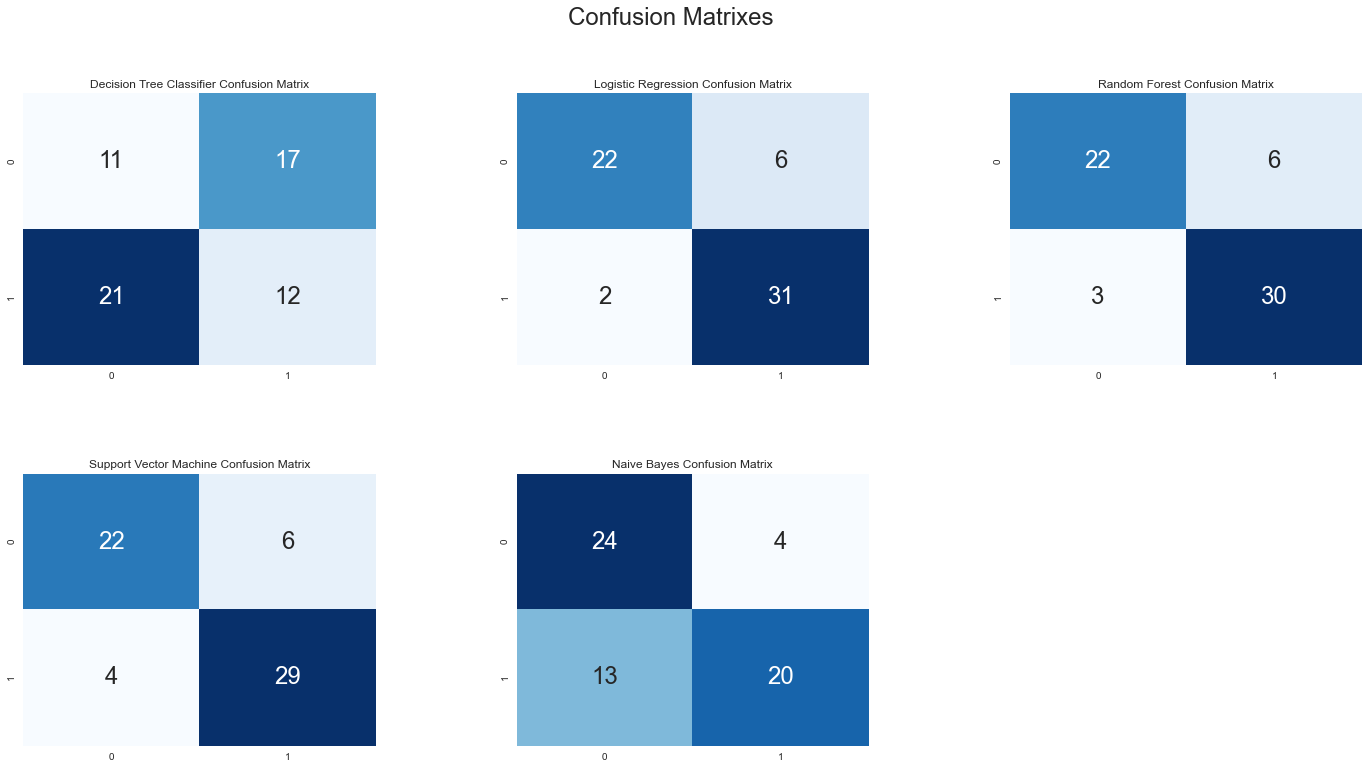

In [328]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sb.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sb.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sb.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sb.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")
sb.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})




plt.show()

Sensitivity measures the proportion of positives that are correctly identified (e.g., the percentage of sick people who are correctly identified as having some illness).
Specificity measures the proportion of negatives that are correctly identified (e.g., the percentage of healthy people who are correctly identified as not having some illness).

In [329]:
total=sum(sum(cm_dtc))

sensitivityDC = cm_dtc[0,0]/(cm_dtc[0,0]+cm_dtc[1,0])
print('Sensitivity for Decision Tree: ', sensitivityDC )

specificityDC = cm_dtc[1,1]/(cm_dtc[1,1]+cm_dtc[0,1])
print('Specificity for Decision Tree: ', specificityDC,"\n")


total=sum(sum(cm_lr))

sensitivityLG = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[1,0])
print('Sensitivity for Logestic Regression: ', sensitivityLG )

specificityLG = cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1])
print('Specificity for Logestic Regression: ', specificityLG ,"\n")


total=sum(sum(cm_rf))

sensitivityRF = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[1,0])
print('Sensitivity for Random Forest: ', sensitivityRF)

specificityRF = cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])
print('Specificity for Random Forest: ', specificityRF,"\n" )


total=sum(sum(cm_nb))

sensitivityNB = cm_nb[0,0]/(cm_nb [0,0]+cm_nb[1,0])
print('Sensitivity for Navie Bayes: ', sensitivityNB)

specificityNB = cm_nb[1,1]/(cm_nb[1,1]+cm_nb[0,1])
print('Specificity for Navie Bayes: ', specificityNB,"\n" )


total=sum(sum(cm_svm))

sensitivitySVM = cm_svm[0,0]/(cm_svm[0,0]+cm_svm[1,0])
print('Sensitivity for Support Vector Machine: ', sensitivitySVM )

specificitySVM = cm_svm[1,1]/(cm_svm[1,1]+cm_svm[0,1])
print('Specificity for Support Vector Machine: ', specificitySVM,"\n")

Sensitivity for Decision Tree:  0.34375
Specificity for Decision Tree:  0.41379310344827586 

Sensitivity for Logestic Regression:  0.9166666666666666
Specificity for Logestic Regression:  0.8378378378378378 

Sensitivity for Random Forest:  0.88
Specificity for Random Forest:  0.8333333333333334 

Sensitivity for Navie Bayes:  0.6486486486486487
Specificity for Navie Bayes:  0.8333333333333334 

Sensitivity for Support Vector Machine:  0.8461538461538461
Specificity for Support Vector Machine:  0.8285714285714286 

